In [2]:
!pip install pandas
#We install pandas for our dataframe in

In [3]:
!pip install chembl_webresource_client
# This part we install the database we will be using which will be chembl 

     |████████████████████████████████| 192 kB 1.8 MB/s eta 0:00:01
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 5.3.1
    Uninstalling PyYAML-5.3.1:
      Successfully uninstalled PyYAML-5.3.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.4 requires pathlib, which is not installed.
lazypredict 0.2.9 requires PyYAML==5.3.1, but you have pyyaml 6.0 which is incompatible.


In [4]:
from chembl_webresource_client.new_client import new_client
#importing new_client from the chembl database

In [5]:
import pandas as pd 
#Importing pandas as pd again 

In [8]:
#target search for coronavirus
target = new_client.target
target_query = target.search('aromatse')
targets = pd.DataFrame.from_dict(target_query)
targets

""


In [12]:
selected_target = targets.target_chembl_id[4]
selected_target

'CHEMBL3927'

In [13]:
#this is used to retreive bioactivity data for coronavirus 
#3C-like proteniase (chembl3927 that are reported as IC50 value
activity = new_client.activity 
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")

In [14]:
df= pd.DataFrame.from_dict(res)

In [15]:
df.head(3)

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,1480935,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,BAO_0000357,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,7.2
1,None,1480936,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,BAO_0000357,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,9.4
2,None,1481061,[],CHEMBL830868,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,BAO_0000357,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,13.5


In [16]:
df.standard_type.unique()

array(['IC50'], dtype=object)

In [17]:
# the standard value in the above output shows the potency of the drug. The lower the number, the better the potency. The higher, the worse. 

In [18]:
#create a csv called bioactivity_data 
df.to_csv('bioactivity_data.csv', index = False)

In [19]:
#if any compounds has a missing value for the standard_value column then drop it
df2 = df[df.standard_value.notna()]
df2

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,1480935,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,BAO_0000357,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,7.2
1,None,1480936,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,BAO_0000357,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,9.4
2,None,1481061,[],CHEMBL830868,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,BAO_0000357,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,13.5
3,None,1481065,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,BAO_0000357,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,13.11
4,None,1481066,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,BAO_0000357,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,None,12041507,[],CHEMBL2150313,Inhibition of SARS-CoV PLpro expressed in Esch...,B,None,None,BAO_0000190,BAO_0000019,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,10.6
129,None,12041508,[],CHEMBL2150313,Inhibition of SARS-CoV PLpro expressed in Esch...,B,None,None,BAO_0000190,BAO_0000019,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,10.1
130,None,12041509,[],CHEMBL2150313,Inhibition of SARS-CoV PLpro expressed in Esch...,B,None,None,BAO_0000190,BAO_0000019,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,11.5
131,None,12041510,[],CHEMBL2150313,Inhibition of SARS-CoV PLpro expressed in Esch...,B,None,None,BAO_0000190,BAO_0000019,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,10.7


In [20]:
bioactivity_class = []
for i in df2.standard_value:
    if float (i) >= 10000:
        bioactivity_class.append("inactive")
    elif float(i) <= 1000:
        bioactivity_class.append("active")
    else:
        bioactivity_class.append("intermediate")

In [21]:
df2.molecule_chembl_id

0       CHEMBL187579
1       CHEMBL188487
2       CHEMBL185698
3       CHEMBL426082
4       CHEMBL187717
           ...      
128    CHEMBL2146517
129     CHEMBL187460
130     CHEMBL363535
131     CHEMBL227075
132      CHEMBL45830
Name: molecule_chembl_id, Length: 133, dtype: object

In [22]:
# we will now iterate to prevent redundancy on 
mol_cid =[] # create this variable 
for i in df2.molecule_chembl_id:
    mol_cid.append(i)

In [23]:
mol_cid

['CHEMBL187579',
 'CHEMBL188487',
 'CHEMBL185698',
 'CHEMBL426082',
 'CHEMBL187717',
 'CHEMBL365134',
 'CHEMBL187598',
 'CHEMBL190743',
 'CHEMBL365469',
 'CHEMBL188983',
 'CHEMBL191575',
 'CHEMBL370923',
 'CHEMBL194398',
 'CHEMBL196635',
 'CHEMBL209287',
 'CHEMBL358279',
 'CHEMBL348660',
 'CHEMBL379727',
 'CHEMBL210525',
 'CHEMBL148483',
 'CHEMBL383725',
 'CHEMBL118596',
 'CHEMBL208732',
 'CHEMBL208732',
 'CHEMBL210146',
 'CHEMBL210146',
 'CHEMBL207458',
 'CHEMBL207458',
 'CHEMBL207484',
 'CHEMBL207484',
 'CHEMBL207207',
 'CHEMBL207207',
 'CHEMBL210487',
 'CHEMBL210487',
 'CHEMBL380470',
 'CHEMBL380470',
 'CHEMBL210612',
 'CHEMBL210612',
 'CHEMBL209667',
 'CHEMBL209667',
 'CHEMBL210097',
 'CHEMBL210097',
 'CHEMBL378674',
 'CHEMBL378674',
 'CHEMBL210216',
 'CHEMBL210216',
 'CHEMBL210195',
 'CHEMBL210195',
 'CHEMBL210437',
 'CHEMBL210437',
 'CHEMBL378677',
 'CHEMBL378677',
 'CHEMBL210972',
 'CHEMBL210972',
 'CHEMBL210145',
 'CHEMBL210145',
 'CHEMBL377225',
 'CHEMBL377225',
 'CHEMBL210823

In [24]:
canonical_smiles = []
for i in df2.canonical_smiles:
    canonical_smiles.append(i)
#This ended up being the more complicated way of doing things

In [25]:
standard_value = []
for i in df2.standard_value:
    standard_value.append(i)

In [26]:
# This is the alternate eay of getting what we wanted 
selection = ['molecule_chembl_id', 'canonical_smiles',
             'standard_value']
df3 = df2[selection]
df3

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,7200.0
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,9400.0
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,13500.0
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,13110.0
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],2000.0
...,...,...,...
128,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,10600.0
129,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,10100.0
130,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,11500.0
131,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,10700.0


In [27]:
data_tuples = list(zip(mol_cid, canonical_smiles, bioactivity_class, standard_value))
df3 = pd.DataFrame(data_tuples, columns= ['molecule_chembl_id', 'canonical_smiles', 'bioactivity_class', 'standard_value'])

In [28]:
pd.concat([df3,pd.Series(bioactivity_class)],axis=1)


,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value,0
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,intermediate,7200.0,intermediate
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,intermediate,9400.0,intermediate
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,13500.0,inactive
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,13110.0,inactive
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],intermediate,2000.0,intermediate
...,...,...,...,...,...
128,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,inactive,10600.0,inactive
129,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,inactive,10100.0,inactive
130,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,inactive,11500.0,inactive
131,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,inactive,10700.0,inactive


In [29]:
df3.to_csv('bioactivity_preprocessed_data.csv', index = False)

In [30]:
ls -l


total 121392
-rw-r--r--  1 josephlenzo  staff    724742 Mar 16 10:23 Bioinformatic for drug discovery .ipynb
-rw-r--r--  1 josephlenzo  staff    180388 Nov  2 12:14 Carmax Data Analytics.ipynb
-rw-r--r--  1 josephlenzo  staff     17025 Dec  1 15:27 HD_Scott.ipynb
-rw-r--r--  1 josephlenzo  staff  15686583 Oct 19 13:17 ShowcaseDataFall21.csv
-rw-r--r--  1 josephlenzo  staff  14577574 Oct 22 14:53 ShowcaseDataFall21fin.csv
drwxr-xr-x  2 josephlenzo  staff        64 Oct 19 13:18 Untitled Folder/
-rw-r--r--  1 josephlenzo  staff      4991 Nov 29 11:55 Untitled.ipynb
-rw-r--r--  1 josephlenzo  staff    655414 Feb  1 11:16 acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv
-rw-r--r--  1 josephlenzo  staff   8363459 Feb  8 15:03 acetylcholirnesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv
-rw-r--r--  1 josephlenzo  staff     70334 Mar 16 10:24 bioactivity_data.csv
-rw-r--r--  1 josephlenzo  staff     94720 Mar  2 17:29 bioactivity_prediction_app.ipynb
-rw-r--r--  1 josephlenzo

In [31]:
ls -l

total 121392
-rw-r--r--  1 josephlenzo  staff    724742 Mar 16 10:23 Bioinformatic for drug discovery .ipynb
-rw-r--r--  1 josephlenzo  staff    180388 Nov  2 12:14 Carmax Data Analytics.ipynb
-rw-r--r--  1 josephlenzo  staff     17025 Dec  1 15:27 HD_Scott.ipynb
-rw-r--r--  1 josephlenzo  staff  15686583 Oct 19 13:17 ShowcaseDataFall21.csv
-rw-r--r--  1 josephlenzo  staff  14577574 Oct 22 14:53 ShowcaseDataFall21fin.csv
drwxr-xr-x  2 josephlenzo  staff        64 Oct 19 13:18 Untitled Folder/
-rw-r--r--  1 josephlenzo  staff      4991 Nov 29 11:55 Untitled.ipynb
-rw-r--r--  1 josephlenzo  staff    655414 Feb  1 11:16 acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv
-rw-r--r--  1 josephlenzo  staff   8363459 Feb  8 15:03 acetylcholirnesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv
-rw-r--r--  1 josephlenzo  staff     70334 Mar 16 10:24 bioactivity_data.csv
-rw-r--r--  1 josephlenzo  staff     94720 Mar  2 17:29 bioactivity_prediction_app.ipynb
-rw-r--r--  1 josephlenzo

In [32]:
#End of part 1 Data collection 
#Beginning of Part 2 Data extraction 

In [33]:
#part two contains the IC50 and we will only choose 
#two bioactivity class which will be active and inactive
#rdkit will allow for dowload of molecular descriptors
# All done within the terminal 

In [34]:
import pandas as pd

In [35]:
#Loading up the CSV file code from the previcous code
df = pd.read_csv('bioactivity_preprocessed_data.csv')

In [36]:
# We use the lipinski descriptor which is a rule
#of thumb eavaluating drug likeness of compunds. 
# Lipinksi analyzes the active fda approved drugs using the rule of 5
# 1.)Molecular weight > 500 dalton 2.) Octanal-wter partation coeffient(LogP)>5 
#3.) Hydrogen bond donars <5 4.) Hydrogen bond acceptors < 10

import numpy as np 
#from rdkit import Chem 
from rdkit.chem import Descriptors, Lipinski 

ModuleNotFoundError: No module named 'rdkit.chem'

In [ ]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')


In [37]:
from rdkit import Chem 

In [38]:
from rdkit.Chem import Descriptors, Lipinski 

In [39]:
# CALCULATING THE DESCRIPTORS#

def lipinski(smiles, verbose=False):
#The smiles notation contatins the chemical
#information which tells us the exact atomic details of the molecule 

    
    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)
        
    baseData= np.arange(1,1)
    i=0
    for mol in moldata:
        
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHdonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
        
        row = np.array([desc_MolWt,
                       desc_MolLogP,desc_NumHdonors ,
                       desc_NumHAcceptors])
        if(i == 0):
            baseData=row 
        else: 
            baseData=np.vstack([baseData,row ])
        i= i+1
        
    columnNames= ["MW","LogP","NumHdonors", "NumHAcceptors" ]
    descriptors = pd.DataFrame(data = baseData, columns = columnNames)
    
    return descriptors 

In [40]:
df_lipinski = lipinski(df.canonical_smiles)

In [41]:
df_lipinski 

,MW,LogP,NumHdonors,NumHAcceptors
0,281.271,1.89262,0.0,5.0
1,415.589,3.81320,0.0,2.0
2,421.190,2.66050,0.0,4.0
3,293.347,3.63080,0.0,3.0
4,338.344,3.53900,0.0,5.0
...,...,...,...,...
128,338.359,3.40102,0.0,5.0
129,296.366,3.44330,0.0,3.0
130,276.291,4.09564,0.0,3.0
131,278.307,3.29102,0.0,3.0


In [42]:
# MW descriptor tells us the size 
# LogP descriptor tells us solibility 

In [43]:
df 
#The dataframe from part one

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,intermediate,7200.0
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,intermediate,9400.0
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,13500.0
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,13110.0
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],intermediate,2000.0
...,...,...,...,...
128,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,inactive,10600.0
129,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,inactive,10100.0
130,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,inactive,11500.0
131,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,inactive,10700.0


In [44]:
# We will combine the 2 data frames 
df_combined = pd.concat([df,df_lipinski], axis=1)

In [45]:
df_combined

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value,MW,LogP,NumHdonors,NumHAcceptors
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,intermediate,7200.0,281.271,1.89262,0.0,5.0
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,intermediate,9400.0,415.589,3.81320,0.0,2.0
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,13500.0,421.190,2.66050,0.0,4.0
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,13110.0,293.347,3.63080,0.0,3.0
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],intermediate,2000.0,338.344,3.53900,0.0,5.0
...,...,...,...,...,...,...,...,...
128,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,inactive,10600.0,338.359,3.40102,0.0,5.0
129,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,inactive,10100.0,296.366,3.44330,0.0,3.0
130,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,inactive,11500.0,276.291,4.09564,0.0,3.0
131,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,inactive,10700.0,278.307,3.29102,0.0,3.0


In [46]:
#CONVERT IC50 T0 pIC50
# this will allow data to be more uniformly distributed
# this will make the distribution more even 

import numpy as np

def pIC50(input):
    pIC50 = []
    
    for i in input['standard_value_norm']:
        molar = i*(10**-9)# converts nM to M|nanoMoler to Moler
        pIC50.append(-np.log10(molar))
        
    input ['pIC50']=pIC50
    x = input.drop('standard_value_norm', 1)
    
    return x

In [47]:
df_combined.standard_value.describe()

count    1.330000e+02
mean     8.017926e+12
std      3.344888e+13
min      5.000000e+01
25%      1.070000e+04
50%      2.350000e+04
75%      3.000000e+05
max      3.311311e+14
Name: standard_value, dtype: float64

In [48]:
-np.log10((10**-9)* 100000000)

1.0

In [49]:
-np.log10((10**-9)* 10000000000)

-1.0

In [50]:
def norm_value(input):
    norm = []
    
    for i in input['standard_value']:
        if i > 100000000:
            i = 100000000
        norm.append(i)
            
    input['standard_value_norm'] = norm 
    x = input.drop('standard_value', 1 )
    
    return x

In [51]:
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHdonors,NumHAcceptors,standard_value_norm
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,intermediate,281.271,1.89262,0.0,5.0,7200.0
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,intermediate,415.589,3.81320,0.0,2.0,9400.0
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,421.190,2.66050,0.0,4.0,13500.0
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,293.347,3.63080,0.0,3.0,13110.0
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],intermediate,338.344,3.53900,0.0,5.0,2000.0
...,...,...,...,...,...,...,...,...
128,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,inactive,338.359,3.40102,0.0,5.0,10600.0
129,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,inactive,296.366,3.44330,0.0,3.0,10100.0
130,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,inactive,276.291,4.09564,0.0,3.0,11500.0
131,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,inactive,278.307,3.29102,0.0,3.0,10700.0


In [52]:
df_combined.standard_value.describe()

count    1.330000e+02
mean     8.017926e+12
std      3.344888e+13
min      5.000000e+01
25%      1.070000e+04
50%      2.350000e+04
75%      3.000000e+05
max      3.311311e+14
Name: standard_value, dtype: float64

In [53]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHdonors,NumHAcceptors,pIC50
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,intermediate,281.271,1.89262,0.0,5.0,5.142668
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,intermediate,415.589,3.81320,0.0,2.0,5.026872
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,421.190,2.66050,0.0,4.0,4.869666
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,293.347,3.63080,0.0,3.0,4.882397
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],intermediate,338.344,3.53900,0.0,5.0,5.698970
...,...,...,...,...,...,...,...,...
128,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,inactive,338.359,3.40102,0.0,5.0,4.974694
129,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,inactive,296.366,3.44330,0.0,3.0,4.995679
130,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,inactive,276.291,4.09564,0.0,3.0,4.939302
131,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,inactive,278.307,3.29102,0.0,3.0,4.970616


In [54]:
 df_final.pIC50.describe()

count    133.000000
mean       4.060148
std        1.783762
min        1.000000
25%        3.522879
50%        4.628932
75%        4.970616
max        7.301030
Name: pIC50, dtype: float64

In [55]:
#Here we will be deleting the intermidate class from our data set 

df_2class = df_final[df_final.bioactivity_class != 'intermediate']
df_2class

#Tried to do this but I think it was already removed 

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHdonors,NumHAcceptors,pIC50
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,421.190,2.66050,0.0,4.0,4.869666
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,293.347,3.63080,0.0,3.0,4.882397
5,CHEMBL365134,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c(Br)cccc21,active,372.243,4.39330,0.0,3.0,6.008774
7,CHEMBL190743,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccc(I)cc21,active,419.243,4.23540,0.0,3.0,6.022276
8,CHEMBL365469,O=C1C(=O)N(Cc2cc3ccccc3s2)c2cccc(Cl)c21,inactive,327.792,4.28420,0.0,3.0,4.950782
...,...,...,...,...,...,...,...,...
128,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,inactive,338.359,3.40102,0.0,5.0,4.974694
129,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,inactive,296.366,3.44330,0.0,3.0,4.995679
130,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,inactive,276.291,4.09564,0.0,3.0,4.939302
131,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,inactive,278.307,3.29102,0.0,3.0,4.970616


In [56]:
import seaborn as sns
sns.set(style= 'ticks')
import matplotlib.pyplot as plt 

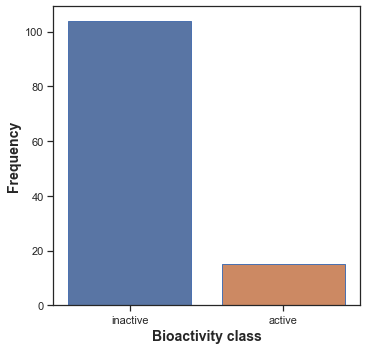

In [57]:
#Creating a frequency plot of the 2 bioactivity classes
#it will compare the inactive and active molecules 
plt.figure (figsize =  (5.5, 5.5))

sns.countplot(x = 'bioactivity_class', data= df_2class, edgecolor= 'b')

#x and y labels are obtained using these lines of code 
plt.xlabel('Bioactivity class', fontsize = 14, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 14, fontweight = 'bold')

#uploaded into a pdf file allowuing use for report or publication 
plt.savefig('plot_bioactivity_class.pdf')

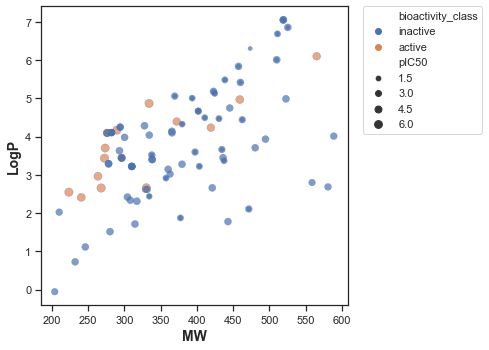

In [58]:
#Define the figure size 
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x = 'MW' , y= 'LogP', data=df_2class, hue = 'bioactivity_class', size = 'pIC50', edgecolor = 'b', alpha = 0.7)
 
plt.xlabel('MW',fontsize = 14, fontweight = 'bold')
plt.ylabel('LogP', fontsize= 14,fontweight = 'bold')
#The line below places the legend outside of the plot having it be easy to see 
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad= 0)
#save it to this pdf file 
plt.savefig('plot_MW_vs_LogP.pdf')


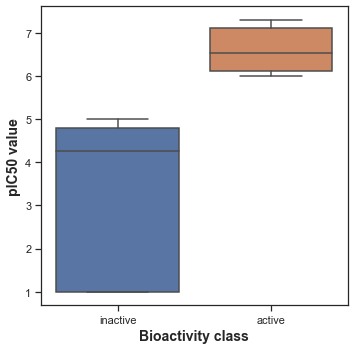

In [59]:
#pIC50 value box plot 

plt.figure(figsize=(5.5,5.5))

sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize= 14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize = 14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

In [60]:
#Statistical analysis | Mann-Whittney U Test : s used to compare 
#whether there is a difference in the dependent variable 
#for two independent groups

def mannwhitney(descriptor, verbose = False):
    from numpy.random import seed
    from numpy.random import randn 
    from scipy.stats import mannwhitneyu

# seed the random number generator 
    seed(1)

#actives and inactives
    selection = [descriptor, 'bioactivity_class']
    df = df_2class[selection]
    active = df[df.bioactivity_class == 'active']
    active = active[descriptor]

    selection = [descriptor, 'bioactivity_class']
    df = df_2class[selection]
    inactive = df[df.bioactivity_class == 'inactive']
    inactive = inactive[descriptor]

#compare samples

    stat, p = mannwhitneyu(active, inactive)

#interpret 
    alpha = 0.05
    if p > alpha:
        
        interpretation = 'Same distribution (fail to reject H0)'
    else:
        interpretation = 'Different distribution (reject H0)'
    
    results = pd.DataFrame({'Descriptor': descriptor,
                       'Statistics': stat,
                       'p':p,
                       'alpha':alpha,
                       'Interpretation':interpretation},index =[0])
    filename = 'mannwhitneyu_'+ descriptor +'.csv'
    results.to_csv(filename)

    return results 

In [61]:
mannwhitney('pIC50')
#compares the active and inactive class to 
# see statistical diff

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,0.0,1.662636e-10,0.05,Different distribution (reject H0)


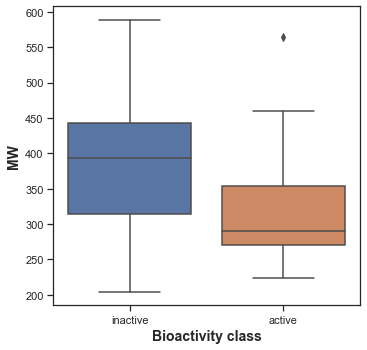

In [62]:
# mann Whitney test for the other descriptors#
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'MW', data = df_2class)          
plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')
            
plt.savefig('plot_MW.pdf')

In [63]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,409.5,0.001525,0.05,Different distribution (reject H0)


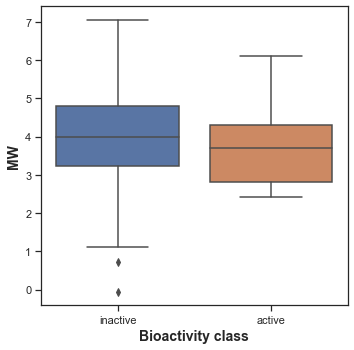

In [64]:
## LOGP ##
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df_2class)
            
plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')
            
plt.savefig('plot_LogP.pdf')

In [65]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,712.5,0.295805,0.05,Same distribution (fail to reject H0)


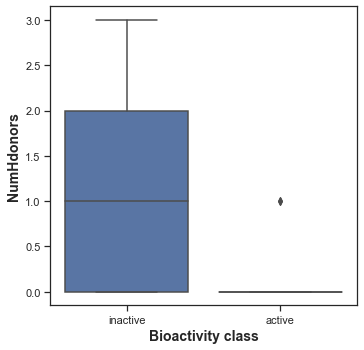

In [66]:
## NUMHDONORS ##
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHdonors', data = df_2class)
            
plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHdonors', fontsize=14, fontweight='bold')
            
plt.savefig('plot_NumHDonors.pdf')

In [67]:
mannwhitney('NumHdonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHdonors,299.5,0.000024,0.05,Different distribution (reject H0)


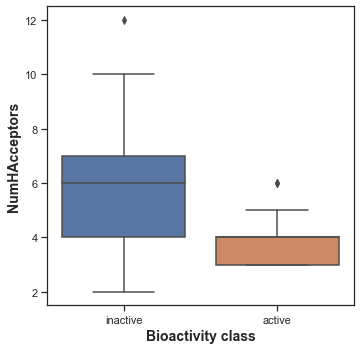

In [68]:
## NUMHACCEPTORS ##
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df_2class)
            
plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')
            
plt.savefig('plot_NumHAcceptors.pdf')

In [69]:
! zip -r results.zip . -i *.csv * .pdf

updating: ShowcaseDataFall21fin.csv (deflated 67%)
updating: Carmax Data Analytics.ipynb (deflated 70%)
updating: bioactivity_data.csv (deflated 90%)
updating: Untitled.ipynb (deflated 78%)
updating: mannwhitneyu_NumHdonors.csv (deflated 9%)
updating: newShowcaseDataFall21.csv (stored 0%)
updating: heart.csv (deflated 77%)
updating: Bioinformatic for drug discovery .ipynb (deflated 57%)
updating: HD_Scott.ipynb (deflated 79%)
updating: mannwhitneyu_MW.csv (deflated 9%)
updating: plot_bioactivity_class.pdf (deflated 38%)
updating: plot_LogP.pdf (deflated 38%)
updating: bioactivity_preprocessed_data.csv (deflated 80%)
updating: plot_MW.pdf (deflated 38%)
updating: plot_NumHDonors.pdf (deflated 38%)
updating: plot_NumHAcceptors.pdf (deflated 37%)
updating: plot_ic50.pdf (deflated 37%)
updating: mannwhitneyu_pIC50.csv (deflated 10%)
updating: ShowcaseDataFall21.csv (deflated 69%)
updating: plot_MW_vs_LogP.pdf (deflated 16%)
updating: mannwhitneyu_LogP.csv (deflated 7%)
updating: descriptor

In [70]:
correlations = df_2class.corr()
print(correlations)

                     MW      LogP  NumHdonors  NumHAcceptors     pIC50
MW             1.000000  0.602828    0.505957       0.679101 -0.377436
LogP           0.602828  1.000000    0.027039       0.218736 -0.259311
NumHdonors     0.505957  0.027039    1.000000       0.648366 -0.488544
NumHAcceptors  0.679101  0.218736    0.648366       1.000000 -0.419205
pIC50         -0.377436 -0.259311   -0.488544      -0.419205  1.000000


In [71]:
df_2class.corr()

,MW,LogP,NumHdonors,NumHAcceptors,pIC50
MW,1.000000,0.602828,0.505957,0.679101,-0.377436
LogP,0.602828,1.000000,0.027039,0.218736,-0.259311
NumHdonors,0.505957,0.027039,1.000000,0.648366,-0.488544
NumHAcceptors,0.679101,0.218736,0.648366,1.000000,-0.419205
pIC50,-0.377436,-0.259311,-0.488544,-0.419205,1.000000


In [72]:
# END OF PART 2 #
## BEGINNING OF PART 3 ##
#We will be calculating the moleculare descriptors and prep the dataset#

In [73]:
! pip install padelpy

In [74]:
import pandas as pd

In [75]:
df4 = pd.read_csv('acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv')

In [76]:
df4

,Unnamed: 0,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,active,312.325,2.80320,0.0,6.0,6.124939
1,1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,active,376.913,4.55460,0.0,5.0,7.000000
2,2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,inactive,426.851,5.35740,0.0,5.0,4.301030
3,3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,active,404.845,4.70690,0.0,5.0,6.522879
4,4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,active,346.334,3.09530,0.0,6.0,6.096910
...,...,...,...,...,...,...,...,...,...
4690,4690,CHEMBL4293155,CC(C)(C)c1cc(/C=C/C(=O)NCCC2CCN(Cc3ccccc3Cl)CC...,intermediate,511.150,7.07230,2.0,3.0,5.612610
4691,4691,CHEMBL4282558,CC(C)(C)c1cc(/C=C/C(=O)NCCC2CCN(Cc3cccc(Cl)c3)...,intermediate,511.150,7.07230,2.0,3.0,5.595166
4692,4692,CHEMBL4281727,CC(C)(C)c1cc(/C=C/C(=O)NCCC2CCN(Cc3ccc(Br)cc3)...,intermediate,555.601,7.18140,2.0,3.0,5.419075
4693,4693,CHEMBL4292349,CC(C)(C)c1cc(/C=C/C(=O)NCCC2CCN(Cc3cccc([N+](=...,intermediate,521.702,6.32710,2.0,5.0,5.460924


In [77]:
# we are only going to select the conconical smiles column
#and the chembl_id 
selection = ['canonical_smiles','molecule_chembl_id']
df4_selection = df4[selection]
#above we are subsetting the data
df4_selection.to_csv('molecule.smi' , sep = '\t', index = False, header = False)

In [78]:
# Looking at the file using BASH 
! cat molecule.smi | head -5
# it will contain the smiles notation and the name of the molecule

CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1	CHEMBL133897
O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1	CHEMBL336398
CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1	CHEMBL131588
O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F	CHEMBL130628
CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C	CHEMBL130478
cat: stdout: Broken pipe


In [79]:
# Quick recap of the above information #
#These smiles notation represent the chemical information that
#pretain to the chemical structure
# example CCOc1nn: C stands for carbon, O for the oxygen, n for nitrogen etc..

In [80]:
# seeing how many lines of molecules we have just to make sure
#all of the rows are being counted in the molecule.smi
! cat molecule.smi | wc -l

    4695


In [81]:
! bash padel.sh
# needto get this oart figured out to get
#authentic feel for cleanng the molecule/ structure so that there are no impurities

bash: padel.sh: No such file or directory


In [82]:
! ls -l

total 124040
-rw-r--r--  1 josephlenzo  staff    724166 Mar 16 10:43 Bioinformatic for drug discovery .ipynb
-rw-r--r--  1 josephlenzo  staff    180388 Nov  2 12:14 Carmax Data Analytics.ipynb
-rw-r--r--  1 josephlenzo  staff     17025 Dec  1 15:27 HD_Scott.ipynb
-rw-r--r--  1 josephlenzo  staff  15686583 Oct 19 13:17 ShowcaseDataFall21.csv
-rw-r--r--  1 josephlenzo  staff  14577574 Oct 22 14:53 ShowcaseDataFall21fin.csv
drwxr-xr-x  2 josephlenzo  staff        64 Oct 19 13:18 Untitled Folder
-rw-r--r--  1 josephlenzo  staff      4991 Nov 29 11:55 Untitled.ipynb
-rw-r--r--  1 josephlenzo  staff    655414 Feb  1 11:16 acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv
-rw-r--r--  1 josephlenzo  staff   8363459 Feb  8 15:03 acetylcholirnesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv
-rw-r--r--  1 josephlenzo  staff     70334 Mar 16 10:24 bioactivity_data.csv
-rw-r--r--  1 josephlenzo  staff     94720 Mar  2 17:29 bioactivity_prediction_app.ipynb
-rw-r--r--  1 josephlenzo 

In [83]:
## Preparing the X and Y Data Matrices ##
df4_X = pd.read_csv('descriptors_output.csv')

In [84]:
df4_X
# The X data matrix Will..
#contain the moleculer descriptors which are the pubchem fingerprints 

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL336398,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL133897,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL130628,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL131588,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL130478,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4690,CHEMBL4293155,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4691,CHEMBL4282558,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4692,CHEMBL4281727,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4693,CHEMBL4292349,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
# removing the name because we just want just the features 
df4_X = df4_X.drop(columns = ['Name'])
df4_X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4690,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4691,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4692,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4693,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [86]:
# The Y data Matix# 

#convert IC50 to pIC50#
df4_Y = df4['pIC50']
df4_Y

0       6.124939
1       7.000000
2       4.301030
3       6.522879
4       6.096910
          ...   
4690    5.612610
4691    5.595166
4692    5.419075
4693    5.460924
4694    5.555955
Name: pIC50, Length: 4695, dtype: float64

In [87]:
# combine X and Y together then uplod to csv for pt.4 #
dataset4 = pd.concat([df4_X,df4_Y],axis = 1)
dataset4

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.124939
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.000000
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.301030
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.522879
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.096910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4690,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.612610
4691,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.595166
4692,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.419075
4693,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.460924


In [88]:
#outputting data set 4 to a csv 

dataset4.to_csv('acetylcholirnesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv', index = False)


# long name desrcibes what is going on 
# name break down 
# acetylcholirnesterase : name of the target protein 
# 06 : sequential order 
#bioactivity_data_3class_pIC50_ : contains bioactivity class with the number of classes 
#pubchem fp : speaks on the finger print type

In [89]:
##End of Part 3 ##
## BEGINNING OF PART 4 ##
#[Buidling a regression model of acetylcholinestrease using random forest algorithem]
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [90]:
df4_upload = pd.read_csv('acetylcholirnesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')


In [91]:
# Input features# 
X = df4_upload.drop('pIC50', axis = 1)
X
#Dropping the pIC50 varaible in order to create the X varaible matrix 
# the pIC50 will be used as the Y varaible

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4690,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4691,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4692,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4693,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [92]:
Y = df4_upload.pIC50
Y

0       6.124939
1       7.000000
2       4.301030
3       6.522879
4       6.096910
          ...   
4690    5.612610
4691    5.595166
4692    5.419075
4693    5.460924
4694    5.555955
Name: pIC50, Length: 4695, dtype: float64

In [93]:
# Examining the data dimension 
X.shape

(4695, 881)

In [94]:
Y.shape

(4695,)

In [95]:
# REMOVE LOW VARIANCE FEATURES #
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8*(1-.8)))
X = selection.fit_transform(X)

In [96]:
X.shape

(4695, 137)

In [97]:
# DATA SPLIT(80/20 split) #
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2)

In [98]:
X_train.shape, Y_train.shape

((3756, 137), (3756,))

In [99]:
X_test.shape, Y_test.shape

((939, 137), (939,))

In [100]:
# Building a simple regression model #
import numpy as np
model = RandomForestRegressor(n_estimators = 100)
model.fit(X_train,Y_train)
r2 = model.score(X_test,Y_test)
r2

0.5185894261410019

In [101]:
Y_pred = model.predict(X_test)

/Users/josephlenzo/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

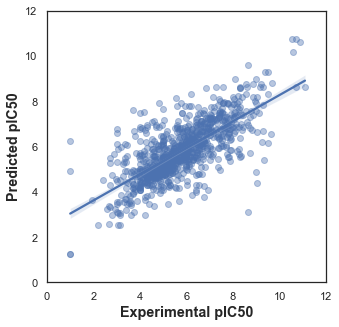

In [102]:
# Scatter Plot of Experimental vs Predicted pIC50 values # 
import seaborn as sns 
import matplotlib.pyplot as plt 

sns.set(color_codes = True)
sns.set_style('white')

ax = sns.regplot(Y_test, Y_pred, scatter_kws = {'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize = 'large', fontweight = 'bold')
ax.set_ylabel('Predicted pIC50', fontsize = 'large', fontweight = 'bold')
ax.set_xlim(0,12)
ax.set_ylim(0,12)
ax.figure.set_size_inches(5,5)
plt.show

In [103]:
  #End of Part 4 #
## BEGINNING OF PART 5 ##
#[Will be comparing several ML algorithems for buidling regession
#models of Acetylcholinesterase inhibitors]

In [104]:
! pip install lazypredict

     |████████████████████████████████| 269 kB 2.2 MB/s eta 0:00:01
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp38-cp38-macosx_10_9_x86_64.whl size=44640 sha256=fbe7f3e695955e856acd442527d34013836e21bff4a4cc7e68ee84edfa05a3c3
  Stored in directory: /private/var/folders/pg/1jhff7l50jvfl0kr524r8h480000gn/T/pip-ephem-wheel-cache-tz0n680l/wheels/13/90/db/290ab3a34f2ef0b5a0f89235dc2d40fea83e77de84ed2dc05c
Successfully built PyYAML
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.4 requires pathlib, which is not installed.
requests-cache 0.7.5 requires pyyaml>=5.4, but you have pyyaml 5.3.1 which is incompatible.


In [105]:
import pandas as pd 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

In [106]:
! brew install libomp

Running `brew update --preinstall`...
==> Auto-updated Homebrew!
Updated 2 taps (homebrew/core and homebrew/cask).
==> New Formulae
aarch64-elf-binutils       go@1.17                    opendht
aarch64-elf-gcc            gst-plugins-rs             procyon-decompiler
aws-auth                   jless                      quick-lint-js
bk                         kdoctor                    rospo
bkt                        koka                       sdl12-compat
boost@1.76                 kopia                      spidermonkey@78
brev                       kubekey                    terraform-lsp
bvm                        kubescape                  testkube
checkmake                  kyverno                    textidote
cloudflared                librasterlite2             trivy
csview                     linux-headers@5.16         trzsz
dpp                        litani                     uutils-findutils
dsq                        mapproxy                   wordle
dynaconf             

In [107]:
import pandas as pd 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

In [108]:
!pip install sklearn

In [109]:
# Load the data set #
# This is the same data set from earlier #
df4_upload = pd.read_csv('acetylcholirnesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

In [110]:
X = df4_upload.drop('pIC50', axis = 1)
Y = df4_upload.pIC50

In [111]:
# Examine X dimension
X.shape

(4695, 881)

In [118]:
# Remove low varaincre features 
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 *(1-.8)))
X = selection.fit_transform(X)
X.shape

(4695, 137)

In [119]:
#Perform data splitting using 80/20 ratio 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size = 0.2)

In [120]:
## COMPARE ML ALGORITHEMS ##

#Defines and builds the lazyclassifier 
clf = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
train,test = clf.fit(X_train, X_test, Y_train, Y_test)

# the clt.fit means it is now going to learn from the data 

100%|███████████████████████████████████████████| 42/42 [00:29<00:00,  1.42it/s]


In [121]:
# performance table of the training set(80 % subset)
train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
RandomForestRegressor,0.43,0.51,1.04,2.88
HistGradientBoostingRegressor,0.42,0.51,1.05,1.96
LGBMRegressor,0.42,0.51,1.05,0.18
SVR,0.40,0.49,1.06,2.41
KNeighborsRegressor,0.40,0.49,1.07,0.53
XGBRegressor,0.39,0.48,1.08,0.43
NuSVR,0.39,0.48,1.08,1.88
BaggingRegressor,0.39,0.48,1.08,0.39
MLPRegressor,0.32,0.42,1.14,3.35


In [122]:
# performance table of the test set (20% subset)
test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
RandomForestRegressor,0.43,0.51,1.04,2.88
HistGradientBoostingRegressor,0.42,0.51,1.05,1.96
LGBMRegressor,0.42,0.51,1.05,0.18
SVR,0.40,0.49,1.06,2.41
KNeighborsRegressor,0.40,0.49,1.07,0.53
XGBRegressor,0.39,0.48,1.08,0.43
NuSVR,0.39,0.48,1.08,1.88
BaggingRegressor,0.39,0.48,1.08,0.39
MLPRegressor,0.32,0.42,1.14,3.35


[(0.0, 1.0)]

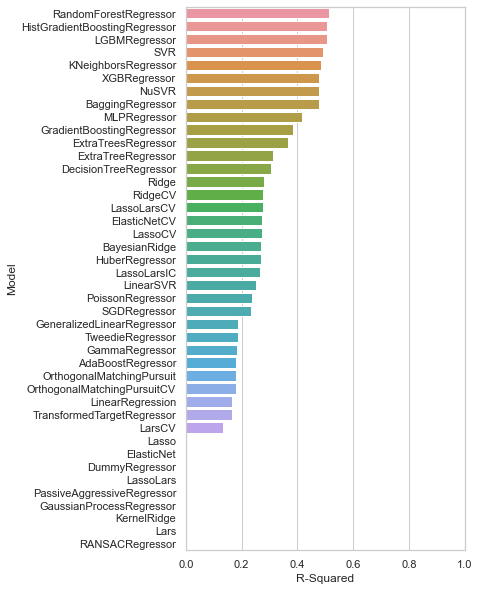

In [123]:
## DATA VISUALIZATION OF MODEL PERFORMACE ##

# bar plot of R-squared values 
import matplotlib.pyplot as plt 
import seaborn as sns

plt.figure(figsize =( 5,10))
sns.set_theme(style = 'whitegrid')
ax = sns.barplot(y= train.index, x = 'R-Squared', data = train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

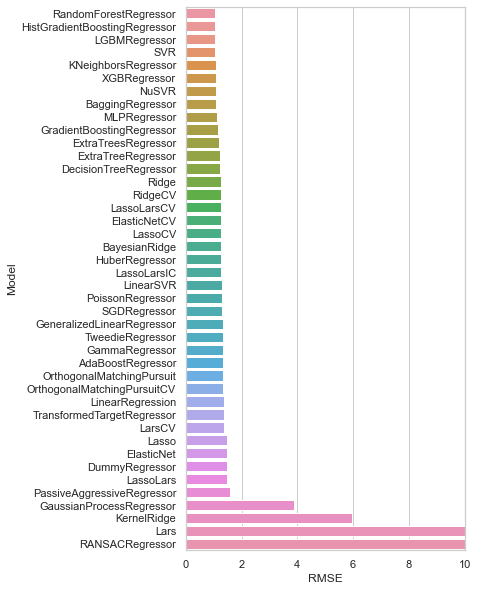

In [124]:
# bar plot of RMSE values 
import matplotlib.pyplot as plt 
import seaborn as sns

plt.figure(figsize =(5,10))
sns.set_theme(style = 'whitegrid')
ax = sns.barplot(y= train.index, x = 'RMSE', data = train)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

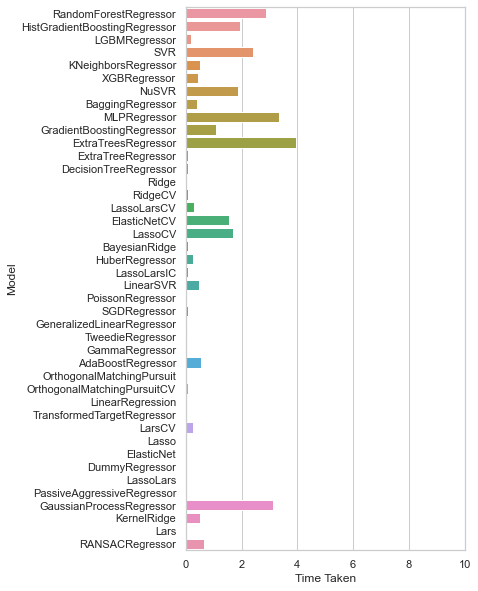

In [125]:
# Barplot of calculation time 

import matplotlib.pyplot as plt 
import seaborn as sns

plt.figure(figsize =(5,10))
sns.set_theme(style = 'whitegrid')
ax = sns.barplot(y= train.index, x = 'Time Taken', data = train)
ax.set(xlim=(0, 10))

In [126]:
#Several machine learning models have now been built for comparison 
# End of part 5#
## BEGINNING OF PART 6 ##

In [127]:
## QSARS Model building Aceylcholestrease ##

#Read in the data 

In [128]:
import pandas as pd

In [129]:
# Downloading and reading in the dataset from the url 
dataset_url = 'https://github.com/dataprofessor/data/raw/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv'
dataset = pd.read_csv(dataset_url)
dataset

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.12
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.00
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.30
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.52
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4690,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.61
4691,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.60
4692,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.42
4693,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.46


In [130]:
# We get 881 columns of pubchem finger prints above( we dont count the pIC50 column)

In [131]:
X = dataset.drop(['pIC50'], axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4690,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4691,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4692,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4693,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [132]:
# We are going to drop the pIC50 column in order to put i t to the X varible
Y = dataset.iloc[:,-1]
Y

0      6.12
1      7.00
2      4.30
3      6.52
4      6.10
       ... 
4690   5.61
4691   5.60
4692   5.42
4693   5.46
4694   5.56
Name: pIC50, Length: 4695, dtype: float64

In [133]:
# Remove low variance features #
# it will allow us to build the model much quicker 
from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

X = remove_low_variance(X, threshold=0.1)
X

,PubchemFP3,PubchemFP12,PubchemFP13,PubchemFP15,PubchemFP16,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP37,PubchemFP143,...,PubchemFP758,PubchemFP761,PubchemFP776,PubchemFP777,PubchemFP797,PubchemFP798,PubchemFP818,PubchemFP819,PubchemFP821,PubchemFP824
0,0,1,0,1,1,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,1,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,1,1,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,1,1,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4690,1,1,0,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,1,0,0
4691,1,1,0,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,1,0,0
4692,1,1,0,1,0,1,1,0,0,0,...,0,0,0,1,1,0,0,1,0,0
4693,1,1,0,1,0,1,1,1,0,0,...,0,0,0,1,1,0,0,1,0,0


In [134]:
# Create a discreptor list for the subsets we get from the input query

X.to_csv('descriptor_list.csv', index = False)

In [135]:
# In the app, use the following to get this same descriptor list
# of 218 variables from the initial set of 881 variables
# Xlist = list(pd.read_csv('descriptor_list.csv').columns)
# X[Xlist]

In [136]:
## Random forest regression model ##

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [137]:
model = RandomForestRegressor(n_estimators=500, random_state=42)
model.fit(X, Y)
r2 = model.score(X, Y)
r2

0.8605481717376796

In [138]:
## Model Prediction

Y_pred = model.predict(X)
Y_pred

array([5.96713845, 6.39396726, 4.93925173, ..., 5.802151  , 5.69163686,
       5.62731398])

In [139]:
#Model Performance
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y, Y_pred))

Mean squared error (MSE): 0.34
Coefficient of determination (R^2): 0.86


In [140]:
# Data Visulalization #
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'Experimental pIC50')

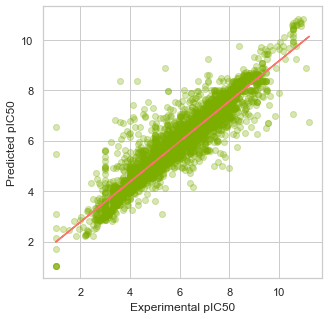

In [144]:
plt.figure(figsize=(5,5))
plt.scatter(x=Y, y=Y_pred, c="#7CAE00", alpha=0.3)

# Add trendline
# https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs
z = np.polyfit(Y, Y_pred, 1)
p = np.poly1d(z)

plt.plot(Y,p(Y),"#F8766D")
plt.ylabel('Predicted pIC50')
plt.xlabel('Experimental pIC50')

In [145]:
#Save model as pickle object #

In [146]:
import pickle 
pickle.dump(model, open('acetylcholinesterase_model.pkl', 'wb'))